### Fractionally differentiated features

#### Data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from FinancialMachineLearning.features.fracdiff import FractionalDifferentiatedFeatures

In [2]:
dollar = pd.read_csv('../../Data/dollar_IVEfuture.csv', index_col = 0, parse_dates = True)
dollar = dollar[~dollar.index.duplicated(keep = 'first')]
dollar

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2009-09-28 09:46:34,80,50.79,51.070,50.7100,51.07,20044,13264,80,1.020027e+06
2009-09-28 09:52:47,142,51.07,51.148,51.0500,51.13,21024,19774,62,1.073986e+06
2009-09-28 09:54:38,201,51.14,51.150,51.1290,51.13,19951,6951,59,1.020145e+06
2009-09-28 09:55:26,243,51.13,51.150,51.1300,51.14,19652,18052,42,1.004999e+06
2009-09-28 10:02:48,339,51.14,51.260,51.0800,51.25,19943,11354,96,1.020512e+06
...,...,...,...,...,...,...,...,...,...
2023-09-14 15:54:32,10930083,162.98,163.060,162.9654,162.98,6186,3983,39,1.008408e+06
2023-09-14 15:59:20,10930131,162.99,163.040,162.9299,163.04,7158,4629,48,1.166735e+06
2023-09-14 15:59:39,10930171,163.04,163.050,162.9900,163.00,6316,3266,40,1.029639e+06


#### Long Memory

대부분의 금융 시계열 분석은 두가지 상황에서 딜레마에 빠진다
1. Box-Jenkins : log difference 데이터는 정상성을 가지지만, market memory를 가지지 않는다
2. Engle-Granger : log price 계열은 market memory를 가진다. 하지만 비정상성을 얻게 된다. Cointegration은 비정상성 시계열에서 회귀모형을 작동 가능하게 하지만 매우 제한적인 상황에서 발견되며, Cointegration의 안정성도 신뢰가 좋다고는 볼 수 없다

Long memory model은 ADF 검정 결과를 지키는 최소한의 차분계수($d$)통해 market memory와 stationarity를 모두 포함하도록 해 준다

**Fractionally differentiated Features**

실수값인 feature $\{X_t\}$에 적용한 backshift 연산자 $B$를 가정해 보자. 여기서 $k \geq 0$인 모든 정수에 대해 $B^kX_t = X_{t-k}$이다. 양의 정수 $n$에 $(x+y)^n = \sum_{k=0}^n {n \choose k} x^k y^{n-k} = \sum_{k=0}^n {n \choose k}x^{n-k}k^k$라는 것에 주목하자. 실수 $d$에서 $(1+x)^d = \sum_{k=0}^\infty {d \choose k} x^k$ 즉, 이항 계열이다. Fractionally differentiated model에서 지수 $d$는 실수값이 가능하고, 다음 형식의 이항 계열 확장을 따른다

$$\begin{matrix}
(1-B)^d = \sum_{k=0}^\infty {d \choose k}(-B)^k &=& \sum_{k=0}^\infty \frac{\prod_{i=0}^{k-1}(d-i)}{k!} \\
       &=& \sum_{k=0}^\infty (-B)^k \prod_{i=0}^{k-1}\frac{d-i}{k-i} \\
       &=& 1 - dB + \frac{d(d-1)}{2!}B^2 - \frac{d(d-1)(d-2)}{3!}B^3 + \cdots
\end{matrix}$$

**Long Memory**

양의 실수 $d$가 기억을 유지하는 법을 알아보도록 하자. 아래의 산술 계열은 내적으로 이뤄져 있다

$$\tilde X_t = \sum_{k=0}^\infty \omega_k X_{t-k}$$

여기서 가중값 $\omega$는

$$\omega = \Big\{
1, -d, \frac{d(d-1)}{2!}, -\frac{d(d-1)(d-2)}{3!}, \cdots, (-1)^k \prod_{i=0}^{k-1} \frac{d-i}{k!}, \cdots
\Big\}$$

그리고 값 $X$는

$$X = \{X_t, X_{t-1}, X_{t-2}, X_{t-3}, \dots, X_{t-k}, \dots\}$$

이다.

$d$가 양의 정수일 때 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>d$이고, 이 지점을 넘어선 market memory는 소멸된다. 예를들어, $d=1$일 경우 수익률을 계산하기 위해 사용하는 차분계수이다. 여기서 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>1$이고 $\omega = \{1,-1,0,0,\cdots \}$이다

가중값 $\omega$의 sequence를 살펴보면 $\omega_0 = 1$이고, $k = 0, \dots, \infty$에 대해서 가중값은 반복적으로 다음과 같이 생성된다.

$$\omega_k = -\omega_{k-1}\frac{d-k+1}{k}$$

**Stationarity with Maximum Memory Preservation**

Time series $\{X_t\}_{t=1, \dots, T}$를 고려해 보자. Fixing-width window fractional difference 방법을 이 계열에 적용하면 Fractional differentiated Series $\{\tilde X_t\}_{t=l^*, \dots, T}$이 정상성을 가지도록 하는 최소의 차분계수 $d^*$를 구할 수 있다. 이 계수는 정상성을 얻기 위해 없애야 하는 기억의 양을 정량화 한다. $\{\tilde X_t\}_{t=l^*, \dots, T}$가 이미 stationary하다면 $d^*=0$이다

$\{\tilde X_t\}_{t=l^*, \dots, T}$가 unit root을 가지고 있다면 $d^* <1$이다. $\{\tilde X_t\}_{t=l^*, \dots, T}$가 폭발적 행태를 보인다면 $d^* >1$이다. 이 중 $0<d^* <1$인 경우는 원시계열이 약간의 비정상성을 가지는 경우로, 이 경우 정상성을 위해 차분이 필요하지만, 1차 차분을 하게 되면 원시계열에 담겨 있는 market memory와 유의미한 신호를 제거하게 된다

In [3]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 1, 11):
    try:
        df1 = np.log(dollar.iloc[:,1:5]).dropna()
        df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d = d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index,'close'], df2['close'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue


KeyboardInterrupt



,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-2.069290,2.570411e-01,1.0,215830.0,-2.861553,1.000000
0.1,-2.200589,2.060317e-01,1.0,133.0,-2.883528,0.985245
0.2,-2.933364,4.160356e-02,1.0,280.0,-2.871918,0.948685
0.3,-4.910110,3.332806e-05,1.0,733.0,-2.865491,0.851828
0.4,-8.191963,7.625309e-13,1.0,2163.0,-2.862877,0.745907
0.5,-21.747763,0.000000e+00,1.0,6931.0,-2.861957,0.435831
0.6,-52.389426,0.000000e+00,1.0,23127.0,-2.861665,0.274371
0.7,-120.526695,0.000000e+00,1.0,71318.0,-2.861581,0.022591
0.8,-216.822470,0.000000e+00,1.0,153442.0,-2.861559,0.006117
0.9,-287.694544,0.000000e+00,1.0,203371.0,-2.861554,-0.005046


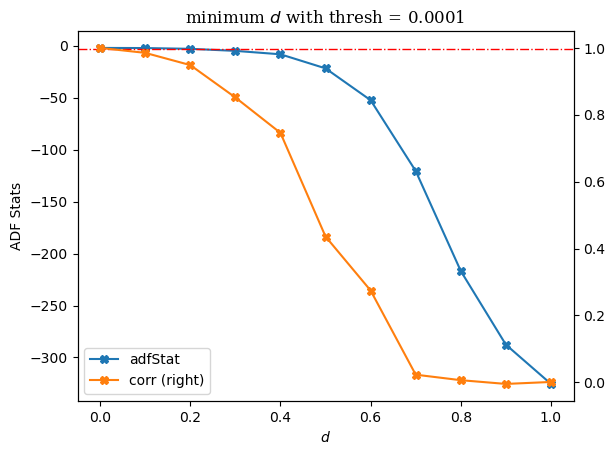

In [5]:
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
ax.set_title(r'minimum $d$ with thresh = 0.0001', fontfamily = 'Serif', fontsize = 12)
ax.set_xlabel(r'$d$')
ax.set_ylabel('ADF Stats');
display(out)

#### Fixing window Fractional Differentiated Series

In [8]:
frac_dollar = FractionalDifferentiatedFeatures.fracDiff_FFD(dollar.iloc[:,4:5], 0.2)

Text(0.5, 1.0, 'Fixing Window Fractionally Differentiated Series')

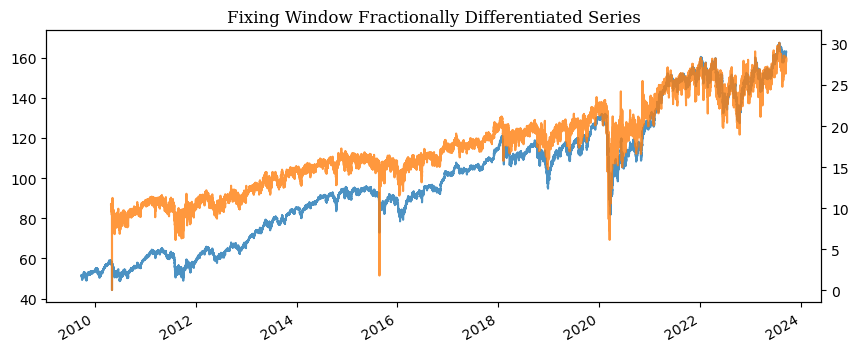

In [9]:
plt.figure(figsize = (10,4))
plt.plot(dollar.close, alpha = 0.8)
frac_dollar.close.plot(secondary_y = True, alpha = 0.8)
plt.grid(False)
plt.title('Fixing Window Fractionally Differentiated Series', fontfamily = 'Serif', fontsize = 12)

#### Expanding window Fractional Differentiated Series

In [10]:
frac_dollar_expand = FractionalDifferentiatedFeatures.fracDiff(dollar.iloc[:,4:5], 0.2)

Text(0.5, 1.0, 'Expanding Window Fractionally Differentiated Series')

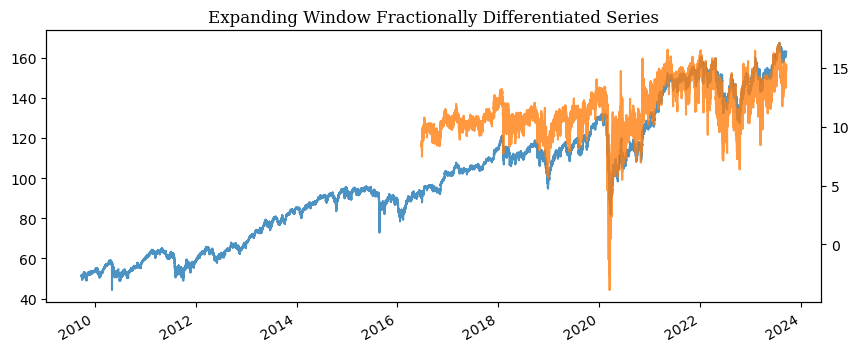

In [11]:
plt.figure(figsize = (10,4))
plt.plot(dollar.close, alpha = 0.8)
frac_dollar_expand.close.plot(secondary_y = True, alpha = 0.8)
plt.grid(False)
plt.title('Expanding Window Fractionally Differentiated Series', fontfamily = 'Serif', fontsize = 12)